In [ ]:
"""1.)Import necessary libraries: pandas, NumPy, matplotlib, seaborn, and sklearn.
2.)Load the dataset from the given URL using pandas.
3.Perform exploratory data analysis to get an overview of the dataset.
4.Handle missing values by dropping the rows with missing values.
5.Select the features and target variables.
6.Split the dataset into training and testing sets using the train_test_split() function from sklearn.
7.Build a logistic regression model using the LogisticRegression() function from sklearn.
8.Evaluate the model using classification_report() function from sklearn.
9.Plot the distribution of the target variable using seaborn's countplot() function.
""""""

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
# Loading the dataset
df = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv")

In [ ]:
df.sample(12)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
18124,18124,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
13500,13500,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Male,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,1
4466,4466,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Hispanic,Male,NaN,NaN,NaN,NaN,"MSA, Not Principle City",1.0,3.0,0
4692,4692,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.0,0.0,1
8061,8061,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Male,"> $75,000",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0
25601,25601,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,White,Male,NaN,NaN,NaN,NaN,Non-MSA,2.0,1.0,0
18776,18776,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Hispanic,Male,"> $75,000",Married,Own,Not in Labor Force,Non-MSA,1.0,0.0,0
22006,22006,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,White,Female,"> $75,000",Not Married,Own,Employed,"MSA, Principle City",0.0,0.0,0
21296,21296,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,2.0,1
5537,5537,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Female,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",2.0,2.0,0


In [ ]:
# Exploratory Data Analysis
print(df.head())
print(df.describe())
   unique_id  h1n1_worry  h1n1_awareness  antiviral_medication  \
0          0         1.0             0.0                   0.0
1          1         3.0             2.0                   0.0
2          2         1.0             1.0                   0.0
3          3         1.0             1.0                   0.0
4          4         2.0             1.0                   0.0

   contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                0.0               0.0                    0.0
1                1.0               0.0                    1.0
2                1.0               0.0                    0.0
3                1.0               0.0                    1.0
4                1.0               0.0                    1.0

   avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  ...  \
0                     0.0                        1.0               1.0  ...
1                     0.0                        1.0               1.0  ...
2                     0.0                        0.0               0.0  ...
3                     1.0                        0.0               0.0  ...
4                     1.0                        0.0               1.0  ...

    race     sex               income_level  marital_status  housing_status  \
0  White  Female              Below Poverty     Not Married             Own
1  White    Male              Below Poverty     Not Married            Rent
2  White    Male  <= $75,000, Above Poverty     Not Married             Own
3  White  Female              Below Poverty     Not Married            Rent
4  White  Female  <= $75,000, Above Poverty         Married             Own

           employment                census_msa  no_of_adults  no_of_children  \
0  Not in Labor Force                   Non-MSA           0.0             0.0
1            Employed  MSA, Not Principle  City           0.0             0.0
2            Employed  MSA, Not Principle  City           2.0             0.0
3  Not in Labor Force       MSA, Principle City           0.0             0.0
4            Employed  MSA, Not Principle  City           1.0             0.0

   h1n1_vaccine
0             0
1             0
2             0
3             0
4             0

[5 rows x 34 columns]
          unique_id    h1n1_worry  h1n1_awareness  antiviral_medication  \
count  26707.000000  26615.000000    26591.000000          26636.000000
mean   13353.000000      1.618486        1.262532              0.048844
std     7709.791156      0.910311        0.618149              0.215545
min        0.000000      0.000000        0.000000              0.000000
25%     6676.500000      1.000000        1.000000              0.000000
50%    13353.000000      2.000000        1.000000              0.000000
75%    20029.500000      2.000000        2.000000              0.000000
max    26706.000000      3.000000        2.000000              1.000000

       contact_avoidance  bought_face_mask  wash_hands_frequently  \
count       26499.000000      26688.000000           26665.000000
mean            0.725612          0.068982               0.825614
std             0.446214          0.253429               0.379448
min             0.000000          0.000000               0.000000
25%             0.000000          0.000000               1.000000
50%             1.000000          0.000000               1.000000
75%             1.000000          0.000000               1.000000
max             1.000000          1.000000               1.000000

       avoid_large_gatherings  reduced_outside_home_cont  avoid_touch_face  \
count             26620.00000               26625.000000      26579.000000
mean                  0.35864                   0.337315          0.677264
std                   0.47961                   0.472802          0.467531
min                   0.00000                   0.000000          0.000000
25%                   0.00000                   0.000000          0.000000
50%                   0.00000                   0.000000          1.000000
75%                   1.00000                   1.000000          1.000000
max                   1.00000                   1.000000          1.000000

       ...  has_health_insur  is_h1n1_vacc_effective  is_h1n1_risky  \
count  ...       14433.00000            26316.000000   26319.000000
mean   ...           0.87972                3.850623       2.342566
std    ...           0.32530                1.007436       1.285539
min    ...           0.00000                1.000000       1.000000
25%    ...           1.00000                3.000000       1.000000
50%    ...           1.00000                4.000000       2.000000
75%    ...           1.00000                5.000000       4.000000
max    ...           1.00000                5.000000       5.000000

       sick_from_h1n1_vacc  is_seas_vacc_effective  is_seas_risky  \
count         26312.000000            26245.000000   26193.000000
mean              2.357670                4.025986       2.719162
std               1.362766                1.086565       1.385055
min               1.000000                1.000000       1.000000
25%               1.000000                4.000000       2.000000
50%               2.000000                4.000000       2.000000
75%               4.000000                5.000000       4.000000
max               5.000000                5.000000       5.000000

       sick_from_seas_vacc  no_of_adults  no_of_children  h1n1_vaccine
count         26170.000000  26458.000000    26458.000000  26707.000000
mean              2.118112      0.886499        0.534583      0.212454
std               1.332950      0.753422        0.928173      0.409052
min               1.000000      0.000000        0.000000      0.000000
25%               1.000000      0.000000        0.000000      0.000000
50%               2.000000      1.000000        0.000000      0.000000
75%               4.000000      1.000000        1.000000      0.000000
max               5.000000      3.000000        3.000000      1.000000

[8 rows x 25 columns]

In [ ]:
# Handling missing values
print(df.isna().sum())
df = df.dropna()
unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment                    1463
census_msa                       0
no_of_adults                   249
no_of_children                 249
h1n1_vaccine                     0
dtype: int64

In [ ]:
# Encoding categorical variables
le = LabelEncoder()
df["age_bracket"] = le.fit_transform(df["age_bracket"])
df["qualification"] = le.fit_transform(df["qualification"])
df["race"] = le.fit_transform(df["race"])
df["sex"] = le.fit_transform(df["sex"])
df["income_level"] = le.fit_transform(df["income_level"])
df["marital_status"] = le.fit_transform(df["marital_status"])
df["housing_status"] = le.fit_transform(df["housing_status"])
df["employment"] = le.fit_transform(df["employment"])
df["census_msa"] = le.fit_transform(df["census_msa"])

In [ ]:
# Feature selection
X = df.drop(["h1n1_vaccine"], axis=1)
y = df["h1n1_vaccine"]

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# create a StandardScaler object
scaler = StandardScaler()

In [ ]:
# fit and transform the training data
X_train = scaler.fit_transform(X_train)

In [ ]:
# transform the test data
X_test = scaler.transform(X_test)

In [ ]:
# create a Logistic Regression object and fit the model
lr = LogisticRegression()
lr.fit(X_train, y_train)

In [ ]:
LogisticRegression()

In [ ]:
# Predict on the test data
y_pred = lr.predict(X_test)

In [ ]:
# Model building
model = LogisticRegression()
model.fit(X_train, y_train)


In [ ]:
LogisticRegression()

In [ ]:
# Model evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1652
           1       0.74      0.58      0.65       707

    accuracy                           0.81      2359
   macro avg       0.79      0.74      0.76      2359
weighted avg       0.81      0.81      0.80      2359

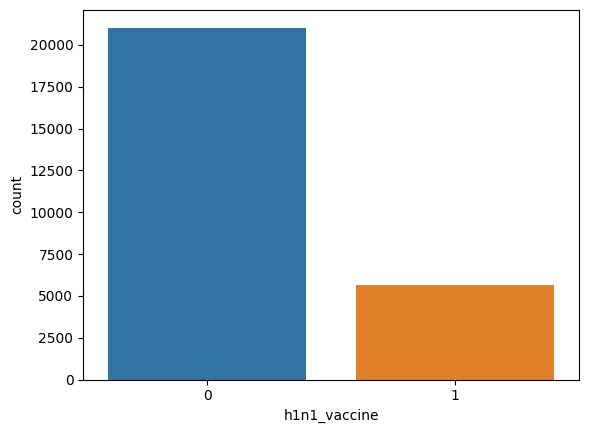

In [64]:
# Plotting the results
sns.countplot(x="h1n1_vaccine", data=df)
plt.show()